In [2]:
import numpy as np
import pandas as pd
import time
import datetime
from time import mktime
from datetime import datetime
import geopy

In [3]:
all_data = pd.read_csv(r'/Users/madhavapaliyam/Documents/CMSC/rando/personal_project/atlantic.csv')
all_data = all_data[['ID','Name','Date','Time','Status','Latitude','Longitude','Maximum Wind','Minimum Pressure']]
all_data.sample(5)

,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
758,AL061859,UNNAMED,18591003,0,HU,21.2N,74.4W,80,-999
14502,AL081923,UNNAMED,19231021,600,EX,58.5N,68.0W,30,-999
45015,AL312005,ZETA,20060106,1200,TD,23.1N,49.6W,30,1008
42559,AL032003,BILL,20030629,1200,TS,23.4N,90.5W,35,1007
35825,AL061986,UNNAMED,19860902,0,TD,17.0N,47.0W,30,-999


In [4]:
TIME = []
for entry in all_data.iterrows():
    try:
        if entry[1].Time == 0: 
            TIME.append(datetime.strptime(str(entry[1].Date)+' '+str(entry[1].Time),'%Y%m%d %H'))
        else:
            TIME.append(datetime.strptime(str(entry[1].Date)+' '+str(entry[1].Time),'%Y%m%d %H%M'))
    except:
        TIME.append(np.nan)
        continue

In [5]:
len(TIME) == len(all_data)

True

In [6]:
all_data = all_data[['ID','Name','Status','Latitude','Longitude','Maximum Wind','Minimum Pressure']]
all_data['TIME'] = TIME
all_data.tail()

,ID,Name,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,TIME
49100,AL122015,KATE,EX,41.3N,50.4W,55,981,2015-11-12 12:00:00
49101,AL122015,KATE,EX,41.9N,49.9W,55,983,2015-11-12 18:00:00
49102,AL122015,KATE,EX,41.5N,49.2W,50,985,2015-11-13 00:00:00
49103,AL122015,KATE,EX,40.8N,47.5W,45,985,2015-11-13 06:00:00
49104,AL122015,KATE,EX,40.7N,45.4W,45,987,2015-11-13 12:00:00


In [7]:
from collections import defaultdict
def get_year():
    years = defaultdict(list)
    for entry in all_data.iterrows():
        years[entry[1].TIME.year].append(entry[1].ID)
    yearz = {}
    each_yr = []
    for key in years:
        each_yr.append(key)
        yearz[key] = set(years[key])
    num_hurricanes = []
    for x in yearz.values(): 
        num_hurricanes.append(len(x))
    return (each_yr, num_hurricanes)
def get_months():
    months = defaultdict(list)
    for entry in all_data.iterrows():
        months[entry[1].TIME.month].append(entry[1].ID)
    m = {}
    each_month = []
    for key in months:
        each_month.append(key)
        m[key] = set(months[key])
    num_hurricanes = []
    for x in m.values(): 
        num_hurricanes.append(len(x))
    return (each_month, num_hurricanes)



In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
year_info = get_year()
plt.plot(year_info[0], year_info[1])
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes in the Atlantic')

Text(0.5, 1.0, 'Number of Hurricanes in the Atlantic')

Text(0.5, 1.0, 'Hurricanes by Month')

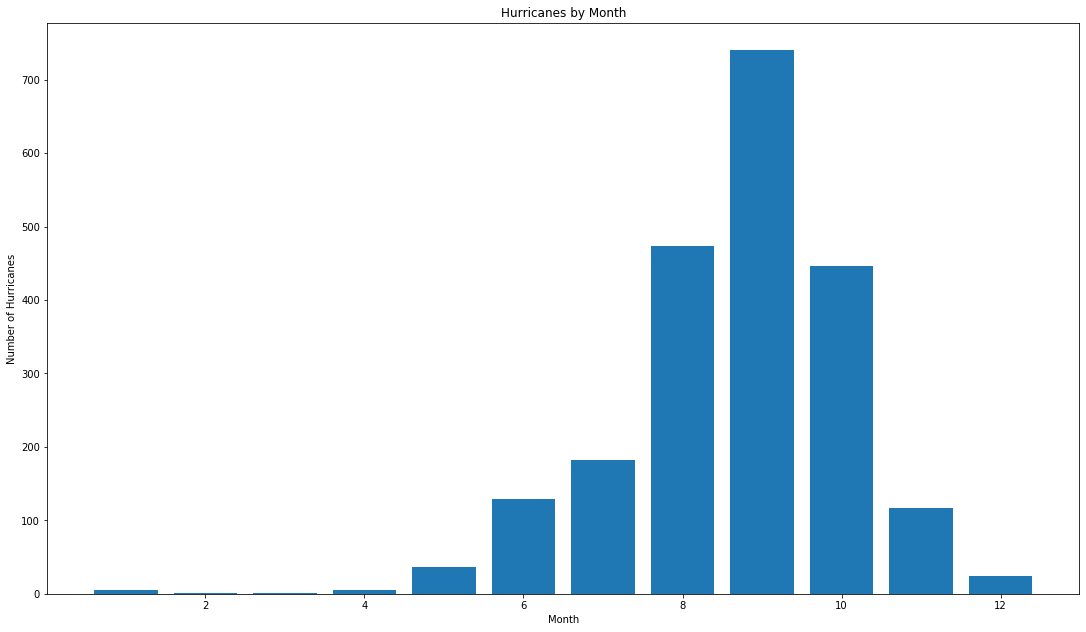

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
month_info = get_months()
plt.bar(month_info[0], month_info[1])
plt.xlabel('Month')
plt.ylabel('Number of Hurricanes')
plt.title('Hurricanes by Month')

In [10]:
import re
new_lat = []
new_long = []
for entry in all_data.iterrows(): 
    match = re.search('\d+.\d+', entry[1]['Latitude'])
    match2 = re.search('\d+.\d+', entry[1]['Longitude'])
    new_lat.append(float(match.group()))
    new_long.append(float('-'+match2.group()))
all_data['Longitude'] = new_long
all_data['Latitude'] = new_lat
long = all_data.groupby('ID')['Longitude'].apply(list)
lat = all_data.groupby('ID')['Latitude'].apply(list)

In [30]:
print("Are lat and long the same length? " + str(len(lat)==len(long)))
print(lat.head())
print(long.head())

Are lat and long the same length? True
ID
AL011851    [28.0, 28.0, 28.0, 28.1, 28.2, 28.2, 28.3, 28....
AL011852    [20.5, 20.7, 20.9, 21.1, 21.2, 21.5, 21.7, 21....
AL011853                                               [32.5]
AL011854    [26.0, 26.0, 26.0, 26.0, 26.0, 26.1, 26.2, 26....
AL011855                                               [22.2]
Name: Latitude, dtype: object
ID
AL011851    [-94.8, -95.4, -96.0, -96.5, -96.8, -97.0, -97...
AL011852    [-67.1, -68.0, -68.8, -69.6, -70.6, -71.9, -73...
AL011853                                              [-69.0]
AL011854    [-92.5, -93.0, -93.5, -94.0, -94.7, -95.7, -97...
AL011855                                              [-98.0]
Name: Longitude, dtype: object


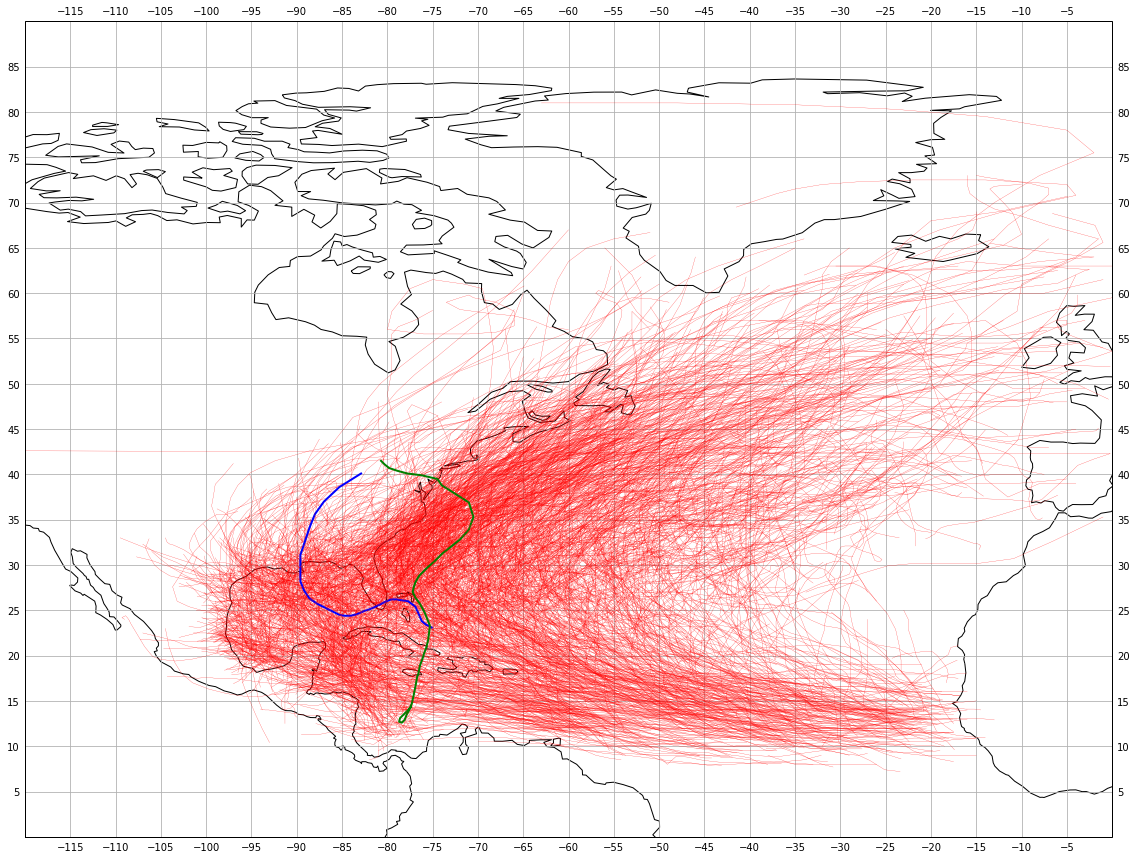

In [12]:
import matplotlib
import cartopy.crs as ccrs
import cartopy
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
for index in range(len(lat)):
    if (lat.index[index] == 'AL122005'):
        ax.plot(long[index],lat[index],'b-',linewidth=2)
    elif (lat.index[index] == 'AL182012'):
        ax.plot(long[index],lat[index],'g-',linewidth=2)
    else:
        ax.plot(long[index],lat[index],'r-',linewidth=0.2)
plt.show()

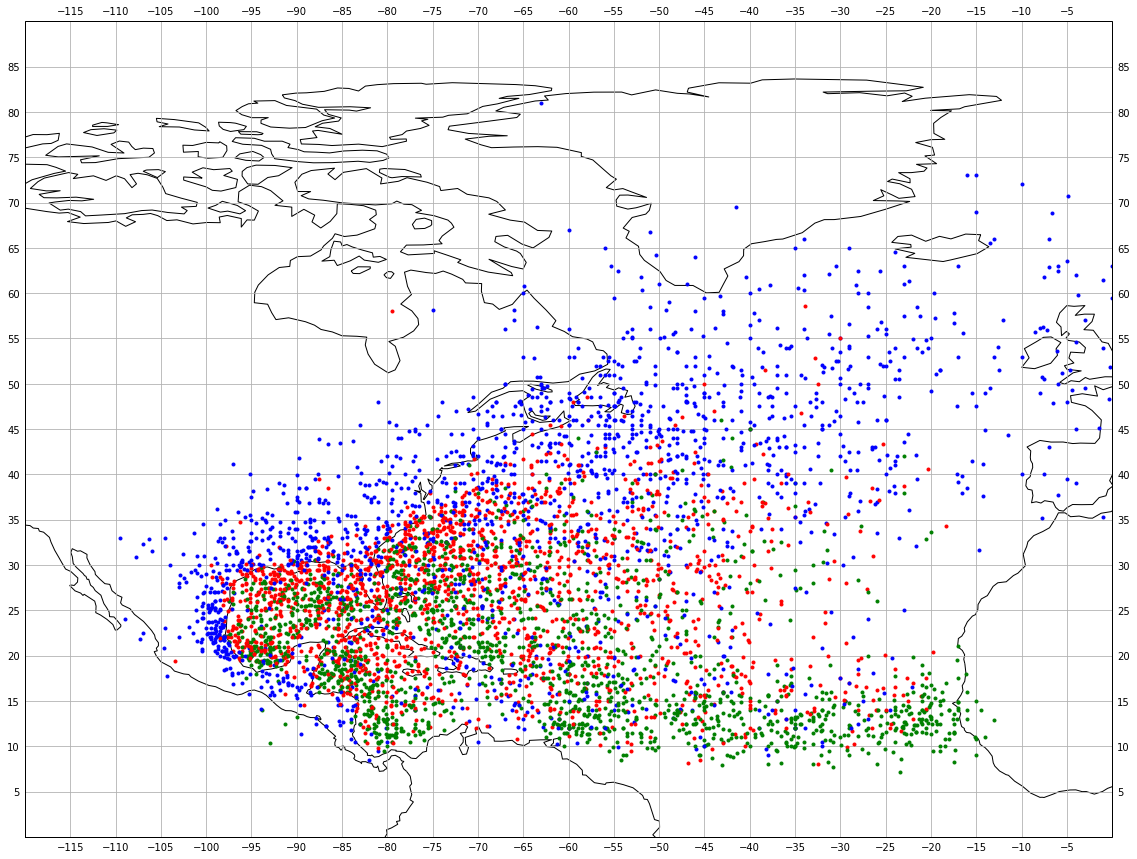

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
for index in range(len(lat)):
    l = int(len(long[index])/2)
    ax.plot(long[index][l],lat[index][l],'ro',markersize=3)
    ax.plot(long[index][-1],lat[index][-1],'bo',markersize=3)
    ax.plot(long[index][0],lat[index][0],'go',markersize=3)
plt.show()




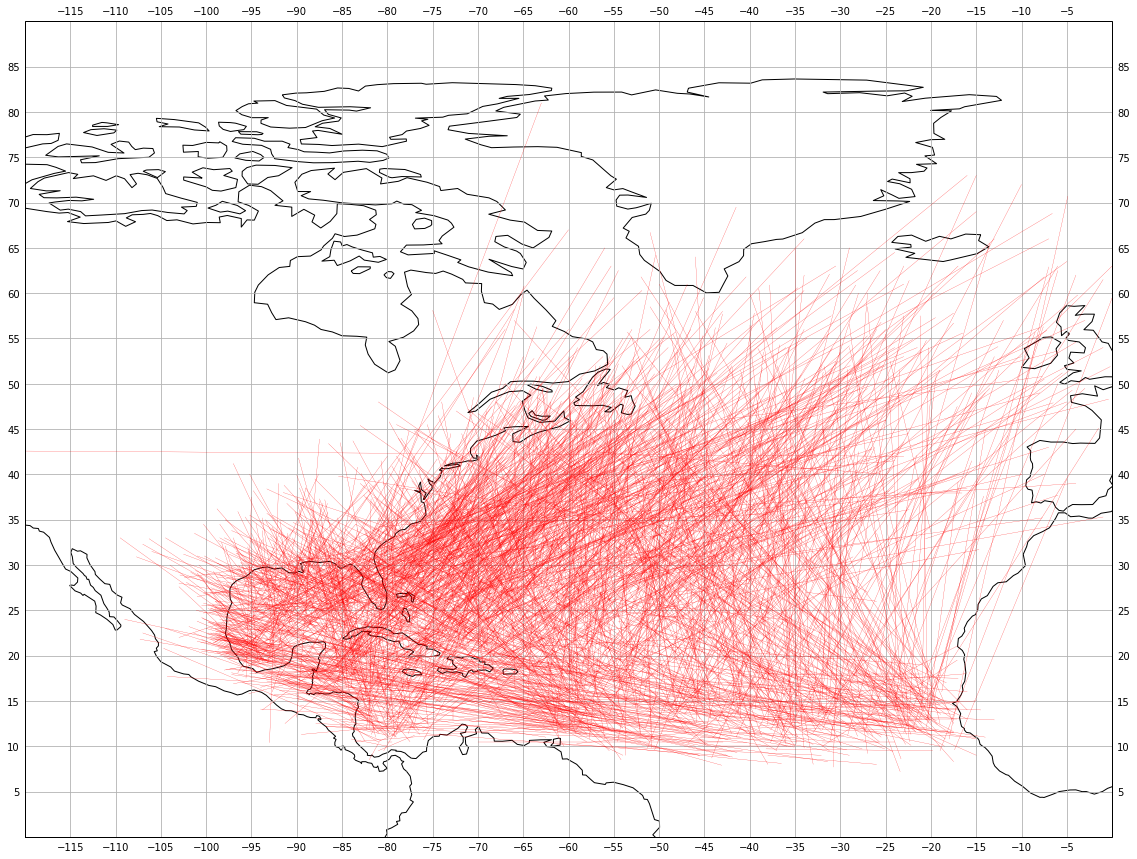

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
slope = []
for index in range(len(lat)):
    ax.plot([long[index][0],long[index][-1]],[lat[index][0],lat[index][-1]],'r-',linewidth=0.2)
    if (long[index][-1]-long[index][0] == 0):
        slope.append(None)
    else:
        slope.append((lat[index][-1] - lat[index][0])/(long[index][-1] - long[index][0]))
all_slopes = pd.Series(data=slope,index=lat.index)
plt.show()

In [16]:
from geopy.distance import geodesic
dist = []
for index in range(len(lat)):
    d = 0
    for pos in range(len(lat[index])-1):
        p1 = (lat[index][pos], long[index][pos])
        p2 = (lat[index][pos+1], long[index][pos])
        d = d + geodesic(p1,p2).miles
    dist.append(d)
all_dist = pd.Series(data=dist,index=lat.index)
len(all_dist) == len(all_slopes)

True

In [17]:
slope_dist = pd.concat([all_dist, all_slopes], axis=1)
slope_dist.columns =['distance traveled','slope']
slope_dist

,distance traveled,slope
ID,,
AL011851,206.626163,-0.555556
AL011852,1412.285579,-22.777778
AL011853,0.000000,NaN
AL011854,137.700314,-0.190476
AL011855,0.000000,NaN
...,...,...
AL282005,440.044942,-0.102804
AL291969,123.707037,1.800000
AL292005,1948.768778,0.176596


(-25, 25)

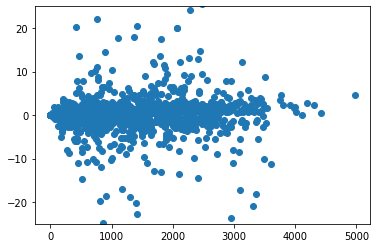

In [18]:
plt.scatter(slope_dist['distance traveled'], slope_dist['slope'])
plt.ylim(-25,25)
